In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
max([max(sequence)for sequence in train_data])

9999

In [2]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.0
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [60]:
from keras import models
from keras import layers

from keras import optimizers

from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,) ,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              #loss=losses.binary_crossentropy,
              #metrics=[metrics.binary_accuracy])


In [61]:
x_val=x_train[:1000]
partial_x_train=x_train[10000:]
y_val=y_train[:1000]
partial_y_train=y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
md=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 1000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.5357 - acc: 0.7833 - val_loss: 0.4101 - val_acc: 0.8470
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.3284 - acc: 0.8989 - val_loss: 0.3115 - val_acc: 0.8760
Epoch 3/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2372 - acc: 0.9270 - val_loss: 0.2780 - val_acc: 0.8800
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1832 - acc: 0.9421 - val_loss: 0.2651 - val_acc: 0.8800
Epoch 5/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1469 - acc: 0.9547 - val_loss: 0.2720 - val_acc: 0.8810
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1207 - acc: 0.9633 - val_loss: 0.2756 - val_acc: 0.8840
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0983 - acc: 0.9712 - val_loss: 0.2914 - v

In [62]:
history_dict=md.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

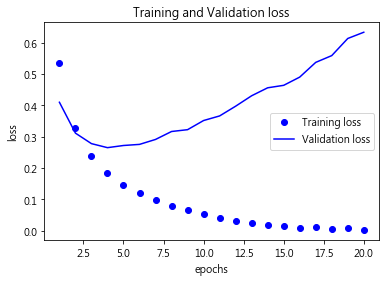

In [63]:
import matplotlib.pyplot as plt
history_dict=md.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo', label='Training loss')
plt.plot(epochs,val_loss_values,'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

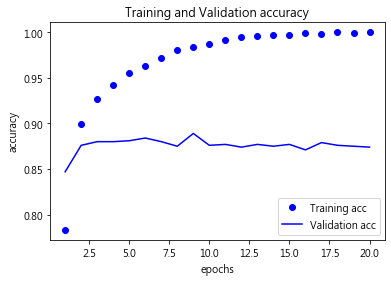

In [64]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()